# Part - 1

We'll begin by loading the loan data. This includes an Excel file (PDA_APEX_Loan_Data.xlsx) and a PDF table (Loans_Database_Table.pdf). We'll convert them into a Python DataFrame for analysis.

In [272]:
# importing the pandas library, which provides powerful data manipulation tool
import pandas as pd

# Get data from Excel File

We are reading data from 'Apex Loans Data.xlsx' input file and storing it in the 'Pda_Apex' object as a data frame. following that, the data is viewd in tabular format to confirm the basic structure of the dataframe created

In [273]:
# Read the first worksheet to get the header 
# use the pd.read_excel() function from pandas library to read the excel file 'PDA_APEX_Loan_Data.xlsx'
# the read_excel() function returns DataFrame containing the data from the specified worksheet
Pda_Apex = pd.read_excel('Apex Loans Data.xlsx')

In [274]:
# Inspect the data
# Use the DataFrame.head() method to retrieve the first five rows of the DataFrame
# This provides a quick overview of the structure and contents of the DataFrame
# It helps ensure that the data has been loaded correctly and gives insight into its format
Pda_Apex.head()

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y


In [275]:
# Check the shape of the DataFrame to determine its dimensions
# Use the DataFrame.shape attribute to retrieve a tuple representing the dimensions of the DataFrame
# The first element of tuple represents the number of rows (247), while the second element represents the number of columns
# This provides the information on the size and structure of the DataFrame
Pda_Apex.shape

(247, 13)

# Extract data from pdf to excel in python

Installing and importing the tabula.py library in order to use specific functions from this library to convert the tabular data from the 'Loans Database Table.pdf' file to .xlsx format. Later on, i am storing the data from the excel file in the form of DataFrame in the 'Loan_Data' object

In [276]:
!pip install tabula-py

Defaulting to user installation because normal site-packages is not writeable


In [277]:
# Importing modules
from tabula import read_pdf

# Reads the entire PDF file named 'Loans_Database_Table_PDF.pdf' using the read_pdf function and stores the extracted tables in the pdf_data variable. since pages = 'all' is specified, all pages of the PDF will be processed
pdf_data = read_pdf('Loans_Database_Table_PDF.pdf', pages='all')


if pdf_data: # this conditional statement checks if pdf_data contains any tables. if there are no tables found in the PDF, the code if within the if block will not be executed. this can be helpful for handling cases where the PDF might not contain the expected tables
    excel_writer = pd.ExcelWriter('Loans_Database_Table.xlsx', engine='xlsxwriter') # assuming pdf_data has tables, this line creates an Excel writer object (excel_writer) using the pandas library (pd). the writer will create a new excel file named "Loans_Database_Table_xlsx" and use the xlsxwriter engine for efficient writing
    for i,df in enumerate(pdf_data): # this loop iterates over each table extracted from the PDF using enumerate. the enumerate function provides both the index (i) and the data (df) for each table in pdf_data
        df.to_excel(excel_writer, sheet_name=f'sheet_{i+1}', index=False) #inside the 'sheet_name': sets the name of the worksheet in the excel file. the 'index = False: argument prevents the row numbers from DataFrame from being included as an extra column in the Excel sheet
        
excel_writer.close() # once all tables have been written to the excel file, this line closes the excel writer object, finalizing the writing process

# overall, this code demonstrates a well-structured approach to converting a PDF table into an excel spreadsheet. it leverages the 'tabula' library for PDF table extraction and pandas for excel writing. the use of a loop ensures each table is written to a separate sheet

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tabula\io.py:1045: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[c] = pd.to_numeric(df[c], errors="ignore")


In [278]:
# The table in the pdf file is in 14 pages, while converting the pdf to excel, the tables were created in 14 worksheets. this code will combine the multiple worksheets into a single sheet
# The code reads data from multiple sheets in an excel file and combines them into a single DataFrame

first_sheet = pd.read_excel('Loans_Database_Table.xlsx', sheet_name = 'sheet_1') # This line reads the data from the sheet named "sheet_1" in the 'Loans_Database_Table.xlsx' file using Pandas' read_excel function. The result is stored in the first_sheet DataFrame.
combined_data = pd.DataFrame(columns = first_sheet.columns) # This line creates an empty DataFrame named combined_data. It sets the column names of this DataFrame to be the same as the columns from the first_sheet. This empty DataFrame will be used to accumulate data from all sheets.

# loop through all the worksheets
for sheet_name in pd.ExcelFile('Loans_Database_Table.xlsx').sheet_names: # the for loop iterates through all sheet names in the excel file
    # if it's the first sheet, skip
    if sheet_name == "sheet_1": # This line checks if the current sheet name is "sheet_1". If it is, the loop continues to the next iteration without processing it (since it has been read earlier)
        continue
    
    sheet_data = pd.read_excel('Loans_Database_Table.xlsx', sheet_name = sheet_name, header = None) #  Inside the loop, this line reads data from the current sheet (excluding "sheet_1") using read_excel. The header=None argument specifies that the first row in the sheet does not contain column name
    sheet_data.columns = first_sheet.columns # This line assigns the column names from the first_sheet (which is assumed to have the correct column structure) to the DataFrame sheet_data read from the current sheet. This ensures consistency in column names across all sheets
    combined_data = pd.concat([combined_data, sheet_data], ignore_index = True) # This line uses Pandas' concat function to combine the data from sheet_data (current sheet) with the existing data in combined_data. The ignore_index=True argument ensures that the resulting DataFrame does not have duplicate indices.
    
    combined_data.to_excel('Loans_Database_Table_compiled.xlsx', index = False) # After all sheets are processed, this line saves the final combined_data DataFrame to a new Excel file named 'Loans_Database_Table_compiled.xlsx'. The index=False argument prevents the row numbers from being saved as an extra column in the Excel file
    
# overall, this code effectively automates the process of combining data from multiple sheets in an Excel file into a single, unified Dataframe

C:\Users\HP\AppData\Local\Temp\ipykernel_14784\2867872964.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_data = pd.concat([combined_data, sheet_data], ignore_index = True) # This line uses Pandas' concat function to combine the data from sheet_data (current sheet) with the existing data in combined_data. The ignore_index=True argument ensures that the resulting DataFrame does not have duplicate indices.


In [279]:
# Reads an excel file named "Loans_Database_Table_compiled.xlsx" into a pandas DataFrame
Loans_Database = pd.read_excel('Loans_Database_Table_compiled.xlsx')
Loans_Database

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1086,1,0.0,0.1,0.2,0.3,1442,0.4,35,360,1.1,1.2,N
1,1087,2,0.0,2.0,1.0,0.0,3750,2083.0,120,360,1.0,2.0,Y
2,1091,1,1.0,1.0,1.0,0.0,4166,3369.0,201,360,0.0,1.0,N
3,1095,1,0.0,0.0,1.0,0.0,3167,0.0,74,360,1.0,1.0,N
4,1097,1,0.0,1.0,1.0,1.0,4692,0.0,106,360,1.0,3.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2265,1,1.0,2.0,0.0,0.0,1993,1625.0,113,180,1.0,2.0,Y
366,2266,1,1.0,2.0,1.0,0.0,3100,1400.0,113,360,1.0,1.0,Y
367,2272,1,1.0,2.0,1.0,0.0,3276,484.0,135,360,0.0,2.0,Y
368,2277,2,0.0,0.0,1.0,0.0,3180,0.0,71,360,0.0,1.0,N


In [280]:
Pda_Apex

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0,0,0,0,3902,1666.0,109,333,1,3,Y
1,2287,2,0,0,1,0,1500,1800.0,103,333,0,2,N
2,2288,1,1,2,0,0,2889,0.0,45,180,0,1,N
3,2296,1,0,0,0,0,2755,0.0,65,300,1,3,N
4,2297,1,0,0,1,0,2500,20000.0,103,333,1,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,2978,2,0,0,1,0,2900,0.0,71,333,1,3,Y
243,2979,1,1,3,1,0,4106,0.0,40,180,1,3,Y
244,2983,1,1,1,1,0,8072,240.0,253,333,1,1,Y
245,2984,1,1,2,1,0,7583,0.0,187,333,1,1,Y


In [281]:
Loans_Database

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1086,1,0.0,0.1,0.2,0.3,1442,0.4,35,360,1.1,1.2,N
1,1087,2,0.0,2.0,1.0,0.0,3750,2083.0,120,360,1.0,2.0,Y
2,1091,1,1.0,1.0,1.0,0.0,4166,3369.0,201,360,0.0,1.0,N
3,1095,1,0.0,0.0,1.0,0.0,3167,0.0,74,360,1.0,1.0,N
4,1097,1,0.0,1.0,1.0,1.0,4692,0.0,106,360,1.0,3.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,2265,1,1.0,2.0,0.0,0.0,1993,1625.0,113,180,1.0,2.0,Y
366,2266,1,1.0,2.0,1.0,0.0,3100,1400.0,113,360,1.0,1.0,Y
367,2272,1,1.0,2.0,1.0,0.0,3276,484.0,135,360,0.0,2.0,Y
368,2277,2,0.0,0.0,1.0,0.0,3180,0.0,71,360,0.0,1.0,N


In [282]:
# pd.concat function merges two pandas DataFrames named Pda_Apex and Loans_Database into a new DataFrame called afs_loan
afs_loan = pd.concat([Pda_Apex,Loans_Database],
                       axis=0, ignore_index=True) 

In [283]:
afs_loan

,Loan_ID,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,2284,1,0.0,0.0,0.0,0.0,3902,1666.0,109,333,1.0,3.0,Y
1,2287,2,0.0,0.0,1.0,0.0,1500,1800.0,103,333,0.0,2.0,N
2,2288,1,1.0,2.0,0.0,0.0,2889,0.0,45,180,0.0,1.0,N
3,2296,1,0.0,0.0,0.0,0.0,2755,0.0,65,300,1.0,3.0,N
4,2297,1,0.0,0.0,1.0,0.0,2500,20000.0,103,333,1.0,2.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,2265,1,1.0,2.0,0.0,0.0,1993,1625.0,113,180,1.0,2.0,Y
613,2266,1,1.0,2.0,1.0,0.0,3100,1400.0,113,360,1.0,1.0,Y
614,2272,1,1.0,2.0,1.0,0.0,3276,484.0,135,360,0.0,2.0,Y
615,2277,2,0.0,0.0,1.0,0.0,3180,0.0,71,360,0.0,1.0,N


In [284]:
# setting 'Loan_ID' column as its index

afs_loan.set_index('Loan_ID', inplace = True)

In [285]:
afs_loan

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
2284,1,0.0,0.0,0.0,0.0,3902,1666.0,109,333,1.0,3.0,Y
2287,2,0.0,0.0,1.0,0.0,1500,1800.0,103,333,0.0,2.0,N
2288,1,1.0,2.0,0.0,0.0,2889,0.0,45,180,0.0,1.0,N
2296,1,0.0,0.0,0.0,0.0,2755,0.0,65,300,1.0,3.0,N
2297,1,0.0,0.0,1.0,0.0,2500,20000.0,103,333,1.0,2.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
2265,1,1.0,2.0,0.0,0.0,1993,1625.0,113,180,1.0,2.0,Y
2266,1,1.0,2.0,1.0,0.0,3100,1400.0,113,360,1.0,1.0,Y
2272,1,1.0,2.0,1.0,0.0,3276,484.0,135,360,0.0,2.0,Y


# What Information Does info() Provide?


Data Type Summary: It shows the data type of each column in the DataFrame (e.g., integer, float, string). This helps understand the kind of data stored in each column.
<br>Non-Null Counts: It displays the number of non-null (not missing) values in each column. This provides insights into the presence of missing data.
<br>Memory Usage: It indicates the approximate amount of memory the DataFrame is using.

# How is This Information Useful?

Data Understanding: The output from info() helps you get a quick overview of the structure and characteristics of your DataFrame. You can see if there are any data type inconsistencies or missing values that might require further cleaning or processing.
<br>Identifying Potential Issues: It can reveal potential issues like columns with a high number of missing values or unexpected data types, which might need to be addressed before further analysis.
<br>In essence, afs_loan.info() is a valuable tool for gaining insights into the structure and content of the afs_loan DataFrame. This information is crucial for data cleaning, exploration, and analysis tasks.

In [286]:
# this line of code uses the info() method on the DataFrame afs_loan to display informative summary statistics about its contents

afs_loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 2284 to 2281
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             617 non-null    int64  
 1   Married            617 non-null    float64
 2   Dependents         617 non-null    float64
 3   Graduate           617 non-null    float64
 4   Self_Employed      617 non-null    float64
 5   ApplicantIncome    617 non-null    int64  
 6   CoapplicantIncome  617 non-null    float64
 7   LoanAmount         617 non-null    int64  
 8   Loan_Amount_Term   617 non-null    int64  
 9   Credit_History     617 non-null    float64
 10  Property_Area      617 non-null    float64
 11  Loan_Status        617 non-null    object 
dtypes: float64(7), int64(4), object(1)
memory usage: 62.7+ KB


# To check for duplicates

Duplicates are records that have identical or very similar values for some or all variables, and they can introduce bias, noise and errors in analysis and modeling <br>

afs_loan.duplicated(): This part applies the duplicated() method to the afs_loan DataFrame. The duplicated() method identifies rows that are entirely identical to another row based on all columns in the DataFrame (considering both data values and data types). It returns a boolean Series where True indicates a duplicate row and False indicates a unique row.

<br>.sum(): The .sum() method is applied to the result of duplicated(). Since duplicated() returns a boolean Series, applying .sum() essentially counts the number of True values, which corresponds to the total number of duplicate rows in the DataFrame.

In [287]:
# to check for duplicate rows in the afs_loan DataFrame and returns the totla number of duplicates
afs_loan.duplicated().sum()

# this code efficiently counts how many rows in afs_loan are complete duplicates of other rows. thsi can be helpful for tasks like data cleaning or identifying potential data quality issues

3

In [288]:
duplicates = afs_loan[afs_loan.duplicated()] #this code finds rows in afs_loan that are entirely identical to another row based on all columns. it returns a boolean Series where True indicates a duplicate and False indicates a unique row

if duplicates.empty: # this code is a conditional statement that checks if the duplicates DataFrame is empty (contains no rows). An empty DataFrame indicates that no duplicate rows were found in afs_loan
    print('No duplicated data found')
    
else:
    print(f'duplicated data found: {duplicates}')
    
# this code effectively checks for duplicate rows in a DataFrame and provides informative messages based on the results. This can be a crucial step in data cleaning or ensuring data quality before further analysis

duplicated data found:          Gender  Married  Dependents  Graduate  Self_Employed  \
Loan_ID                                                         
1925          2      0.0         0.0       1.0            1.0   
1945          2      0.0         0.0       1.0            0.0   
1955          2      0.0         0.0       1.0            0.0   

         ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
Loan_ID                                                                     
1925                2600             1717.0          99               300   
1945                5417                0.0         143               480   
1955                5000             2541.0         151               480   

         Credit_History  Property_Area Loan_Status  
Loan_ID                                             
1925                1.0            2.0           N  
1945                0.0            1.0           N  
1955                1.0            3.0           N  


In [289]:
# There are 3 duplicate rows in the DataFrame
duplicates

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
1925,2,0.0,0.0,1.0,1.0,2600,1717.0,99,300,1.0,2.0,N
1945,2,0.0,0.0,1.0,0.0,5417,0.0,143,480,0.0,1.0,N
1955,2,0.0,0.0,1.0,0.0,5000,2541.0,151,480,1.0,3.0,N


In [290]:
# Removing duplicate rows from the afs_loan DataFrame (keeping the first occurence)
afs_loan.drop_duplicates(keep='first', inplace=True) # this line of code addresses duplicate rows in the afs_loan DataFrame. it utilizes the drop_duplicates method from pandas to identify and remove them

In [291]:
afs_loan.shape 

(614, 12)

In [292]:
# sorting afs_loan DataFrame by Loan_ID (Ascending order)
afs_loan.sort_values('Loan_ID', inplace=True) # This line of code sorts the rows in the afs_loan DataFrame based on the values in the 'Loan_ID' column. The sort_values method from pandas is used for this purpose.

In [293]:
afs_loan.head()

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
1086,1,0.0,0.1,0.2,0.3,1442,0.4,35,360,1.1,1.2,N
1087,2,0.0,2.0,1.0,0.0,3750,2083.0,120,360,1.0,2.0,Y
1091,1,1.0,1.0,1.0,0.0,4166,3369.0,201,360,0.0,1.0,N
1095,1,0.0,0.0,1.0,0.0,3167,0.0,74,360,1.0,1.0,N
1097,1,0.0,1.0,1.0,1.0,4692,0.0,106,360,1.0,3.0,N


In [294]:
# after converting the pdf file to excel, the formats of Married,Dependents, Graduate, Self_employed,credit_history and property area are in float64
# since they are analysed as categorical data, i convert them to integers to have a single data either 1 or 0 not 1.2
columns_to_convert = ['Gender','Married','Dependents','Graduate','Self_Employed','Credit_History','Property_Area']

afs_loan[columns_to_convert] = afs_loan[columns_to_convert].astype('int')

In [295]:
afs_loan.head()

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
1086,1,0,0,0,0,1442,0.4,35,360,1,1,N
1087,2,0,2,1,0,3750,2083.0,120,360,1,2,Y
1091,1,1,1,1,0,4166,3369.0,201,360,0,1,N
1095,1,0,0,1,0,3167,0.0,74,360,1,1,N
1097,1,0,1,1,1,4692,0.0,106,360,1,3,N


In [296]:
afs_loan['Self_Employed'].value_counts()

Self_Employed
0    534
1     80
Name: count, dtype: int64

# Missing Values

In [297]:
afs_loan = afs_loan.dropna() # This line of code addresses missing values in the afs_loan DataFrame. It utilizes the dropna method from pandas to filter out rows containing missing data (NaN values)
# this code essentially creates a DataFrame without missing values

In [298]:
afs_loan
# since the number of rows are the same, there are no missing values

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
1086,1,0,0,0,0,1442,0.4,35,360,1,1,N
1087,2,0,2,1,0,3750,2083.0,120,360,1,2,Y
1091,1,1,1,1,0,4166,3369.0,201,360,0,1,N
1095,1,0,0,1,0,3167,0.0,74,360,1,1,N
1097,1,0,1,1,1,4692,0.0,106,360,1,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...
2978,2,0,0,1,0,2900,0.0,71,333,1,3,Y
2979,1,1,3,1,0,4106,0.0,40,180,1,3,Y
2983,1,1,1,1,0,8072,240.0,253,333,1,1,Y


In [299]:
# Replacing Numerical codes with categorical labels in afs_loan DataFrame
# This code block performs a transformation on several columns within the afs_loan DataFrame. It iterates through specific columns and replaces numerical codes with more descriptive categorical labels.

afs_loan['Gender'] = afs_loan['Gender'].replace({1:'Male', 2 : 'Female'})
afs_loan['Married'] = afs_loan['Married'].replace({0:'Single', 1 : 'Married'})
afs_loan['Self_Employed'] = afs_loan['Self_Employed'].replace({0 : 'No',1 : 'Yes'})
afs_loan['Credit_History'] = afs_loan['Credit_History'].replace({0 : 'No',1 : 'Yes'})
#afs_loan['Property_Area'] = afs_loan['Property_Area'].replace({1 : 'Urban',2 : 'Semiurban', 3 : 'Rural'})
afs_loan['Graduate'] = afs_loan['Graduate'].replace({0 : 'No',1 : 'Yes'})

# the essence of this code is to improve readability and interpretability of the afs_loan DataFrame by replacing numerical codes with more meaningful categorical labels for specific columns

In [300]:
afs_loan

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
1086,Male,Single,0,No,No,1442,0.4,35,360,Yes,1,N
1087,Female,Single,2,Yes,No,3750,2083.0,120,360,Yes,2,Y
1091,Male,Married,1,Yes,No,4166,3369.0,201,360,No,1,N
1095,Male,Single,0,Yes,No,3167,0.0,74,360,Yes,1,N
1097,Male,Single,1,Yes,Yes,4692,0.0,106,360,Yes,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...
2978,Female,Single,0,Yes,No,2900,0.0,71,333,Yes,3,Y
2979,Male,Married,3,Yes,No,4106,0.0,40,180,Yes,3,Y
2983,Male,Married,1,Yes,No,8072,240.0,253,333,Yes,1,Y


In [301]:
afs_loan['Property_Area'].value_counts()

Property_Area
2    236
1    195
3    183
Name: count, dtype: int64

# Outliers

Outliers are data points that significantly differ from other observations in a dataset. outliers can skew statistical analyses and machine learning models, leading to misleading results or reduced model performance

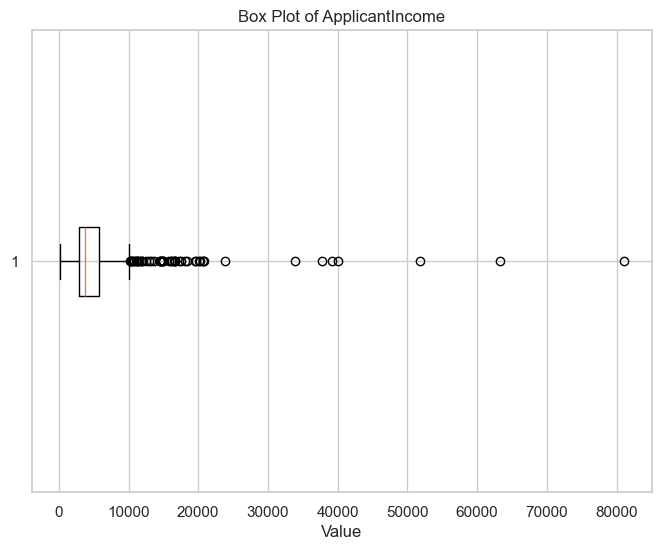

In [302]:
import matplotlib.pyplot as plt # This line imports the matplotlib.pyplot library as plt for creating visualizations in Python.
column_with_outliers = 'ApplicantIncome' # This line defines a variable column_with_outliers that holds the name of the column from DataFrame afs_loan you want to visualize (assumed to contain income data).

plt.figure(figsize =(8,6)) # This line creates a new figure window for the plot with a width of 8 inches and a height of 6 inches. You can adjust these values to customize the plot size.
plt.boxplot(afs_loan[column_with_outliers], vert=False) # This line creates a boxplot of the values in the specified column (column_with_outliers) from data3. The vert=False argument specifies that the boxplot should be displayed horizontally.
plt.title(f'Box Plot of {column_with_outliers}') # This line adds a title to the plot, dynamically including the column name for better understanding.
plt.xlabel('Value') # This line labels the x-axis of the plot as "Value", indicating the income values in this case.
plt.show() # This line displays the generated boxplot on your screen.

By looking at the boxplot, you can identify potential outliers in the ApplicantIncome data. The boxplot will show the quartiles (Q1,Q3) and the interquartile range (IQR). Data points falling outside the whiskers (beyond 1.5 IQR from the quartiles) are possible outliers. this visualization can help me decide on further steps for handling outliers in Applicant Income data such as investigating the reasons behind the high or low loan amounts, or potentially filtering them out if they don't represent typical loan sizes in my analysis which is my course of action


<br>To further interprete the boxplot, the center line (median) which is the horizontal line in the middle of the box represents the median loan amount.This indicates that half of the loans have amounts lower than or equal to the median, and the other half have amounts greater than or equal to the median.

<br> The box encompasses the middle 50% of the data. The bottom edge of the box represents the first quartile (Q1), and the top edge represents the third quartile (Q3). This portion of the boxplot depicts the interquartile range (IQR), which shows the spread of the data within the middle half.

<br> the whiskers are the lines extending from the box.They typically extend to the most extreme values within 1.5 IQR from the quartiles (Q1 and Q3). Data points beyond the whiskers are considered potential outliers.

In [303]:
# Filter outliers based on IQR (interquartile Range)

def filter_outliers_iqr(afs_loan, column): #This line defines a function named filter_outliers_iqr that takes two arguments:
    Q1 = afs_loan[column].quantile(0.25) # This line calculates the first quartile (Q1) of the values in the specified column of the afs_loan DataFrame. The quantile method with 0.25 as an argument retrieves the value that separates the bottom 25% of the data from the rest.
    Q3 = afs_loan[column].quantile(0.75) # this line calculates the third quartile (Q3), which separates the top 25% of the data from the rest.
    IQR = Q3 - Q1 # This line calculates the IQR by subtracting Q1 from Q3. The IQR represents the spread of the middle 50% of the data.
    lower_bound = Q1 - 1.5 * IQR #  This line defines the lower bound for outlier detection. It subtracts 1.5 times the IQR from Q1.
    upper_bound = Q3 + 1.5 * IQR # This line defines the upper bound for outlier detection. It adds 1.5 times the IQR to Q3. Values outside this range are considered outliers.
    afs_loan = afs_loan[(afs_loan[column] >= lower_bound) & (afs_loan[column] <= upper_bound)] # This line creates a new DataFrame afs_loan_filtered containing only the rows from afs_loan where the values in the specified column fall within the defined bounds (not outliers).
    return afs_loan # This line returns the filtered DataFrame afs_loan_filtered containing rows without outliers.

afs_loan = filter_outliers_iqr(afs_loan,'ApplicantIncome')

In [304]:
afs_loan

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
1086,Male,Single,0,No,No,1442,0.4,35,360,Yes,1,N
1087,Female,Single,2,Yes,No,3750,2083.0,120,360,Yes,2,Y
1091,Male,Married,1,Yes,No,4166,3369.0,201,360,No,1,N
1095,Male,Single,0,Yes,No,3167,0.0,74,360,Yes,1,N
1097,Male,Single,1,Yes,Yes,4692,0.0,106,360,Yes,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...
2978,Female,Single,0,Yes,No,2900,0.0,71,333,Yes,3,Y
2979,Male,Married,3,Yes,No,4106,0.0,40,180,Yes,3,Y
2983,Male,Married,1,Yes,No,8072,240.0,253,333,Yes,1,Y


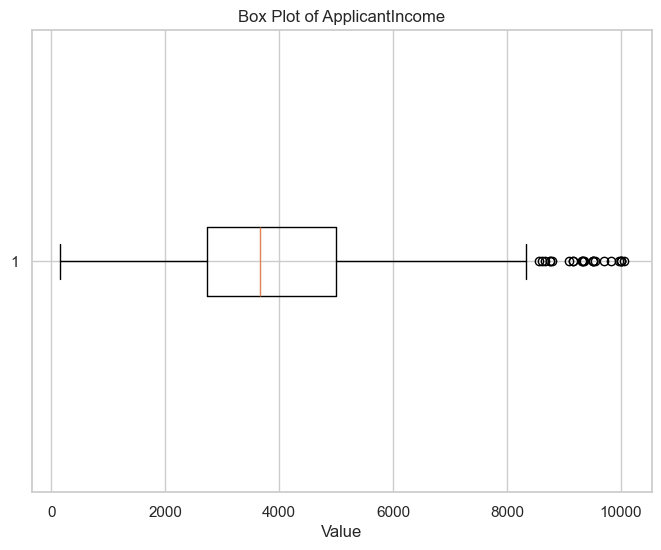

In [305]:
# visualizing after removal of outliers

column_with_outliers = 'ApplicantIncome'

plt.figure(figsize =(8,6))
plt.boxplot(afs_loan[column_with_outliers], vert=False)
plt.title(f'Box Plot of {column_with_outliers}')
plt.xlabel('Value')
plt.show()

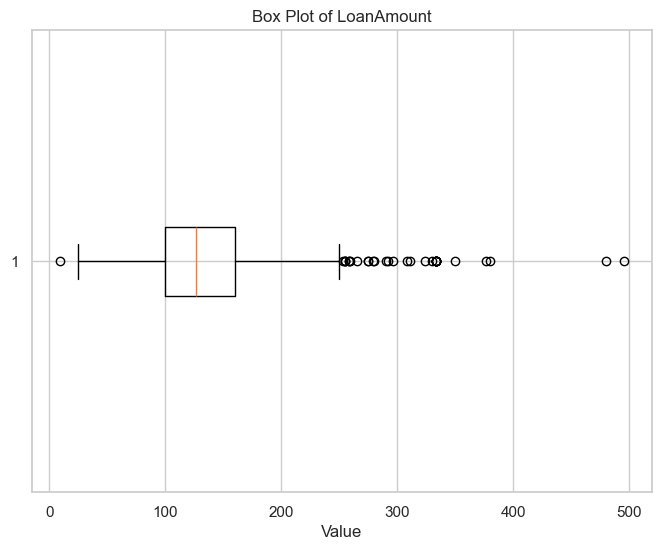

In [306]:
# visualizing Potential outliers in Loan Amount with a box plot

column_with_outliers = 'LoanAmount' # This line defines a variable named column_with_outliers that holds the name of the column you suspect might contain outliers ('LoanAmount' in this case).

plt.figure(figsize =(8,6))
plt.boxplot(afs_loan[column_with_outliers], vert=False)
plt.title(f'Box Plot of {column_with_outliers}')
plt.xlabel('Value')
plt.show()

By looking at the boxplot, you can identify potential outliers in the LoanAmount data. The boxplot will show the quartiles (Q1,Q3) and the interquartile range (IQR). Data points falling outside the whiskers (beyond 1.5 IQR from the quartiles) are possible outliers. this visualization can help me decide on further steps for handling outliers in loan amount data such as investigating the reasons behind the high or low loan amounts, or potentially filtering them out if they don't represent typical loan sizes in my analysis which is my course of action


<br>To further interprete the boxplot, the center line (median) which is the horizontal line in the middle of the box represents the median loan amount.This indicates that half of the loans have amounts lower than or equal to the median, and the other half have amounts greater than or equal to the median.

<br> The box encompasses the middle 50% of the data. The bottom edge of the box represents the first quartile (Q1), and the top edge represents the third quartile (Q3). This portion of the boxplot depicts the interquartile range (IQR), which shows the spread of the data within the middle half.

<br> the whiskers are the lines extending from the box.They typically extend to the most extreme values within 1.5 IQR from the quartiles (Q1 and Q3). Data points beyond the whiskers are considered potential outliers.

<br> the overall interpretation is that the distribution of loan amounts appears to be skewed to the right, meaning there might be more loans on the lower end (towards the left) and a smaller number of loans with much higher amounts (towards the right).

<br> The presence of outliers on the higher end suggests there might be a few loans that are significantly larger than most other loans in the dataset

In [307]:
# filter outliers based on IQR (interquartile Range) and apply to afs_loan
def filter_outliers_iqr(afs_loan, column):
    Q1 = afs_loan[column].quantile(0.25)
    Q3 = afs_loan[column].quantile(0.75)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    afs_loan = afs_loan[(afs_loan[column] >= lower_bound) & (afs_loan[column] <= upper_bound)]
    return afs_loan

afs_loan = filter_outliers_iqr(afs_loan,'LoanAmount')

In [308]:
afs_loan

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
1086,Male,Single,0,No,No,1442,0.4,35,360,Yes,1,N
1087,Female,Single,2,Yes,No,3750,2083.0,120,360,Yes,2,Y
1091,Male,Married,1,Yes,No,4166,3369.0,201,360,No,1,N
1095,Male,Single,0,Yes,No,3167,0.0,74,360,Yes,1,N
1097,Male,Single,1,Yes,Yes,4692,0.0,106,360,Yes,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...
2974,Male,Married,0,Yes,No,3232,1950.0,108,333,Yes,3,Y
2978,Female,Single,0,Yes,No,2900,0.0,71,333,Yes,3,Y
2979,Male,Married,3,Yes,No,4106,0.0,40,180,Yes,3,Y


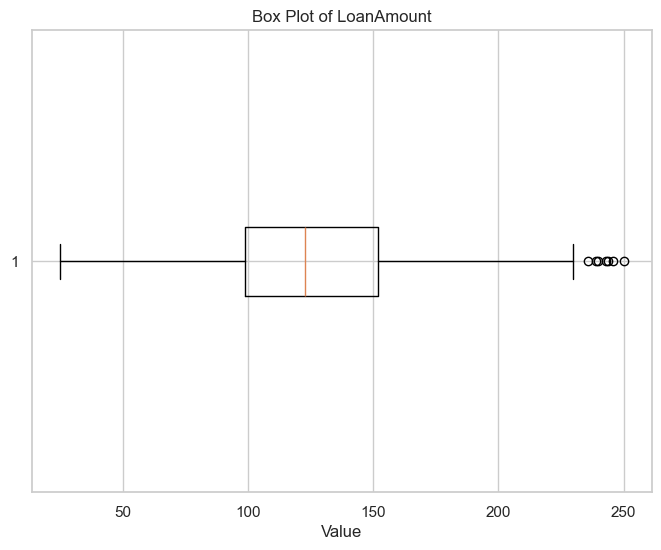

In [309]:
column_with_outliers = 'LoanAmount'

plt.figure(figsize =(8,6))
plt.boxplot(afs_loan[column_with_outliers], vert=False)
plt.title(f'Box Plot of {column_with_outliers}')
plt.xlabel('Value')
plt.show()

# Descriptive analysis

In [310]:
# the total amount loaned by AFS

total_amount_loaned = afs_loan['LoanAmount'].sum() # This line of code calculates the sum of all loan amounts in the afs_loan DataFrame

In [311]:
print(f'the total amount loaned is {total_amount_loaned}')

the total amount loaned is 66374


In [312]:
# the average amount loaned by AFS

avg_amount_loaned = afs_loan['LoanAmount'].mean() # This line of code calculates the average loan amount in the afs_loan DataFrame

In [313]:
print(f'The average amount loaned is {avg_amount_loaned.round(2)}')

The average amount loaned is 125.47


In [314]:
# the average loan term

avg_loan_term = afs_loan['Loan_Amount_Term'].mean() # This line of code calculates the average loan term in the afs_loan DataFrame

In [315]:
print(f'The average loan term is {avg_loan_term.round(2)}')

The average loan term is 334.45


# Analyze Loan Approval Rates by Gender

This code aims to investigate loan approval rates by gender in the dataset. it will calculate <br>

The number of males whose loan applications were approved. <br>
The number of males whose loan applications were not approved (rejected).<br>
The number of females whose loan applications were approved.<br>
The number of females whose loan applications were not approved (rejected).<br>

In [316]:
loan_approved_gender =pd.crosstab(afs_loan['Gender'],afs_loan['Loan_Status'], margins=True, margins_name='Total') # this line of code uses the pd.crosstab function from the pandas library to create cross-tabulation table. this table will show how loan approvals are distributed across different genders in the afs_loan DataFrame
loan_approved_gender

Loan_Status,N,Y,Total
Gender,,,
Female,33,69,102
Male,121,306,427
Total,154,375,529


The data shows that about 71% of males were approved and 67% of females were approved

In [317]:
# To improve comprehension and identify patterns, the data is visualized in a chart
# This line imports the seaborn library and assigns it the alias sns. Seaborn is a popular Python library built on top of Matplotlib that simplifies creating attractive and informative statistical graphics.

import seaborn as sns

In [318]:
# creating a melted format for loan approval analysis by gender

loan_approved_gender = pd.crosstab(afs_loan['Gender'], afs_loan['Loan_Status']) # as commented earlier, this line of code creates a cross-tabulation using pd.crosstab.
loan_approved_gender = loan_approved_gender.reset_index() # this line of code transforms the cross-tabulation table into a regular DataFrame.
loan_approved_gender_melt = pd.melt(loan_approved_gender, id_vars="Gender", var_name="Loan_Status", value_name="Count") # This line uses the pd.melt function from Pandas to reshape the DataFrame from the previous step (loan_approved_gender) into a melted format. 


# the essence the melted format is often more convenient for certain data

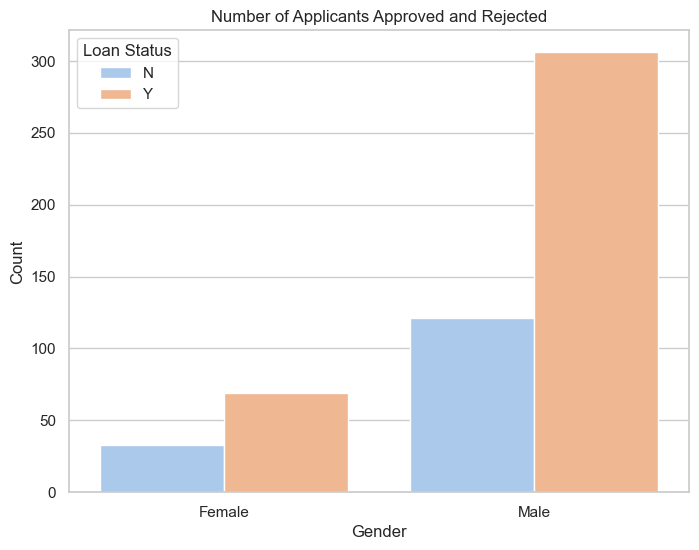

In [319]:
# creating a Bar chart to visualize loan approval rates by gender

sns.set(style='whitegrid') # This line sets the plotting style for Seaborn visualizations (assuming you're using Seaborn). Here, it sets the background style to white with a grid
plt.figure(figsize=(8,6)) # This line creates a new figure window for the plot with a width of 8 inches and a height of 6 inches. You can adjust these values to control the plot size.
sns.barplot(x = "Gender", y = 'Count', hue="Loan_Status", data = loan_approved_gender_melt, palette = 'pastel') #  This line creates a bar chart using Seaborn's sns.barplot function
plt.xlabel('Gender') # This line adds a label for the x-axis, indicating that it represents "Gender
plt.ylabel('Count') # This line adds a label for the y-axis, indicating that it represents the "Count" of loan applications
plt.title('Number of Applicants Approved and Rejected') # This line adds a title to the plot
plt.legend(title = "Loan Status") # This line creates a legend to explain the different colors used in the bars, with the title set to "Loan Status
plt.show() # This line displays the generated bar chart on your screen

In [320]:
# the minimum amount loaned
min_loan_amount = afs_loan['LoanAmount'].min() # This line of code calculates the minimum loan amount present in the LoanAmount column of the DataFrame afs_loan

In [321]:
print(f'The minimum amount loaned is {min_loan_amount}')

The minimum amount loaned is 25


In [322]:
# the maximum amount loaned

max_loan_amount = afs_loan['LoanAmount'].max() # This line of code calculates the maximum loan amount present in the LoanAmount column of the DataFrame afs_loan

In [323]:
print(f'The maximum amount loaned is {max_loan_amount}')

The maximum amount loaned is 250


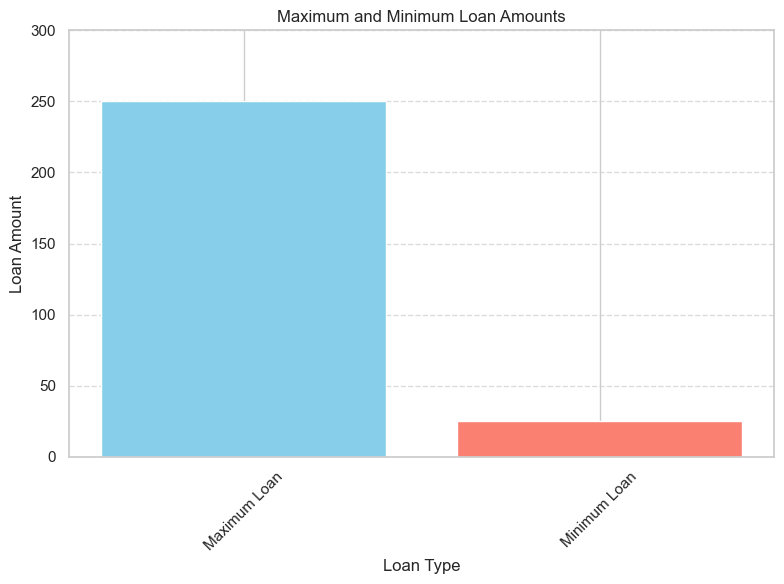

In [324]:
# For a more insightful visual representation, the data is converted into a pie chart.
# create a bar chart
plt.figure(figsize = (8,6))
plt.bar(["Maximum Loan", "Minimum Loan"],[max_loan_amount, min_loan_amount], color = ['skyblue', 'salmon'])
plt.title("Maximum and Minimum Loan Amounts")
plt.xlabel("Loan Type")
plt.ylabel("Loan Amount")
plt.ylim(0,max_loan_amount * 1.2) # set y-axis limit to accommodate labels
plt.xticks(rotation = 45) # rotate x-axis labels for better readability
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7) # Add horizontal gridlines 
plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

# Calculating Approval Rate for Self-Employed Applicants

This code aims to analyze the loan approval rate for self-employed individuals in the dataset. It will calculate the following:

The percentage of self-employed applicants whose loans were approved

In [325]:
# this code calculates the number of loans approved for self-employed applicants in the afs_loan Dataframe
num_approved_self_employed = len(afs_loan[(afs_loan['Self_Employed'] == "Yes") & (afs_loan['Loan_Status'] == "Y")])
print(f' the number of self-employed applicants that got loan approval are {num_approved_self_employed}')

 the number of self-employed applicants that got loan approval are 39


In [326]:
# calculating total loan approvals 
total_approved = len(afs_loan['Loan_Status'] == 'Y')
print(f'the total number of applicants that got loan approval are {total_approved}')

the total number of applicants that got loan approval are 529


In [327]:
# this line of code calculates the percentage of loan approvals for self-employed applicants in realtionto the total number of approvals
percentage_approved_self_employed = (num_approved_self_employed/total_approved) * 100

print(f'The rate of approval of self-employed applicants is {percentage_approved_self_employed}%')

The rate of approval of self-employed applicants is 7.372400756143667%


# Visualize Loan Approval Rate for Self-Employed Applicants

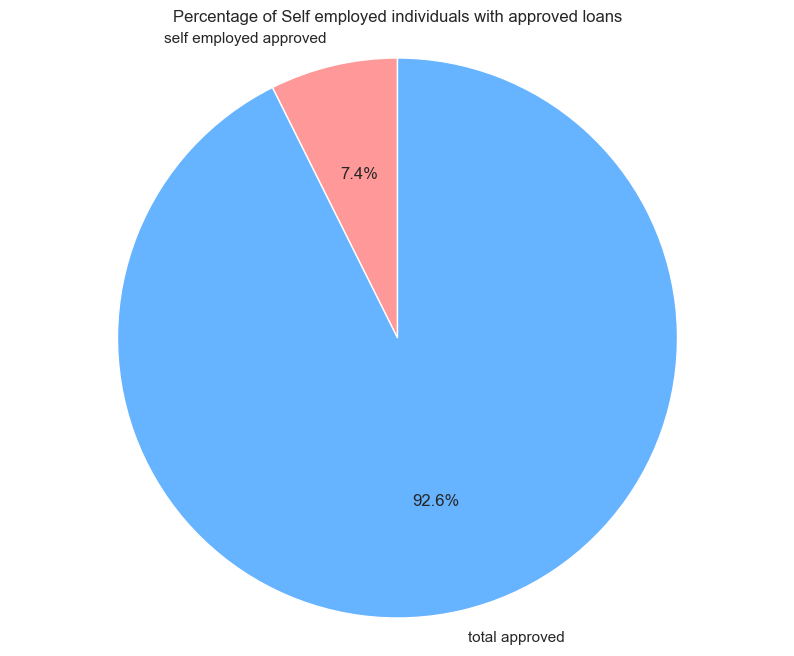

In [328]:
# Creating a pie chart to visualize loan approval rates for self-employed

labels = ['self employed approved', 'total approved'] # this line creates a list named 'labels' containing the text labels that will be used for each slice of the pie chart
# creating sizes for the pie chart

sizes = [percentage_approved_self_employed, 100 - percentage_approved_self_employed] #  This line creates a list named sizes containing the numerical values that define the relative size of each slice in the pie chart.

colors = ['#ff9999', '#66b3ff'] # This line creates a list named colors containing color codes in hexadecimal format. These colors will be used to fill the slices of the pie chart.

plt.figure(figsize=(10,8)) # This line creates a new figure window for the plot with a width of 10 inches and a height of 8 inches
plt.pie(sizes, labels=labels, colors = colors,
        autopct='%1.1f%%', startangle=90) # This line creates the pie chart using plt.pie
plt.axis('equal') # This line sets the aspect ratio of the pie chart to be equal, ensuring a circular shape
plt.title('Percentage of Self employed individuals with approved loans') # This line adds a title to the pie chart, summarizing the information presented
plt.show() # This line displays the generated pie chart on your screen

# Analyze Income Distribution: Average and Standard Deviation

This code calculates two key statistics to understand the distribution of income in the data:

Average Income (Mean): This will represent the typical income level among applicants by calculating the arithmetic mean of all income values.<br>
Standard Deviation of Income: This will quantify the variability in income levels by measuring how spread out the income values are from the average income.<br>
These statistics will provide insights into the income range and how much variation exists within the applicant pool.


In [329]:
average_income = afs_loan["ApplicantIncome"].mean() # This line calculates the average income (arithmetic mean) of all applicants in the DataFrame
std_dev_income = afs_loan["ApplicantIncome"].std() # This line calculates the standard deviation of the applicant income

print(f' the average income is {average_income.round(2)} and the standard deviation of income is {std_dev_income.round(2)}')

 the average income is 3993.1 and the standard deviation of income is 1803.91


# Identify Applicants with Highest Loan Amounts

This code snippet focuses on the applicants seeking the largest loans. It extracts the top 10 rows from the DataFrame, representing the 10 applicants with the highest loan amounts. This data subset can be further analyzed to understand the characteristics of these high-value loan applications.


In [330]:
top_10_applicants = afs_loan.nlargest(10,'LoanAmount') #  This line of code identifies and extracts the rows representing the top 10 applicants with the highest loan amounts from the afs_loan DataFrame
top_10_applicants

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
2640,Male,Married,1,Yes,No,6065,2004.0,250,333,Yes,2,Y
2543,Male,Married,2,Yes,No,8333,0.0,246,333,Yes,2,Y
1531,Male,Single,0,Yes,No,9166,0.0,244,360,Yes,1,N
2622,Male,Married,2,Yes,No,3510,4416.0,243,333,Yes,3,Y
1713,Male,Married,1,Yes,Yes,7787,0.0,240,360,Yes,1,Y
2342,Male,Married,2,Yes,Yes,1600,20000.0,239,333,Yes,1,N
2170,Male,Married,2,Yes,No,5000,3667.0,236,360,Yes,2,Y
2529,Male,Married,2,Yes,No,6700,1750.0,230,300,Yes,2,Y
2139,Male,Married,0,Yes,No,9083,0.0,228,360,Yes,2,Y


# Dstribution of property

In [331]:
# this code block calculates and stores the distribution of property areas int he afs_loan Dataframe

property_distribution = afs_loan['Property_Area'].value_counts()
property_distribution

Property_Area
2    205
1    162
3    162
Name: count, dtype: int64

# Visualize Property Area Distribution with a Bar Chart

This code generates a bar chart to effectively represent the distribution of property areas in the dataset. The chart will display the frequency (count) of applications for properties of each size (area). This visualization will help identify trends in property area preferences among loan applicants.

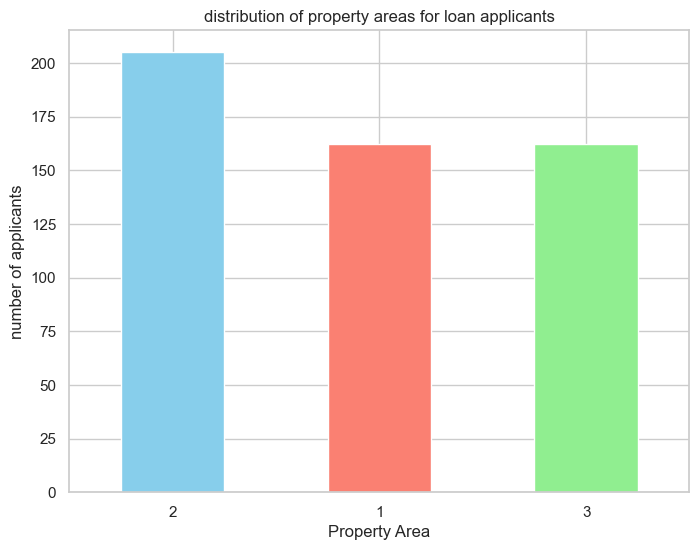

In [332]:
# creating a bar chart to visualize property area distribution

plt.figure(figsize=(8,6))
property_distribution.plot(kind='bar',
                           color = ['skyblue','salmon','lightgreen'])
plt.xlabel('Property Area')
plt.ylabel('number of applicants')
plt.title('distribution of property areas for loan applicants')
plt.xticks(rotation = 0)
plt.show()

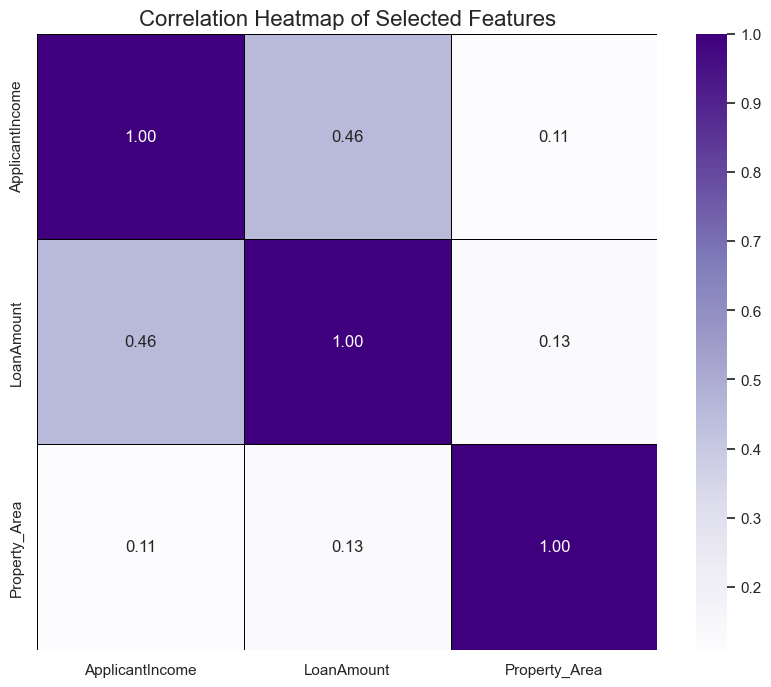

In [338]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
# Select the relevant features for the correlation heatmap
selected_features = afs_loan[['ApplicantIncome', 'LoanAmount','Property_Area']]

# Compute the correlation matrix
correlation_matrix = selected_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Purples", fmt='.2f', linewidths=0.5, linecolor='black')

# Add a title to the heatmap
plt.title('Correlation Heatmap of Selected Features', fontsize=16)
# Show the plot
plt.show()

In [333]:
afs_loan

,Gender,Married,Dependents,Graduate,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
1086,Male,Single,0,No,No,1442,0.4,35,360,Yes,1,N
1087,Female,Single,2,Yes,No,3750,2083.0,120,360,Yes,2,Y
1091,Male,Married,1,Yes,No,4166,3369.0,201,360,No,1,N
1095,Male,Single,0,Yes,No,3167,0.0,74,360,Yes,1,N
1097,Male,Single,1,Yes,Yes,4692,0.0,106,360,Yes,3,N
...,...,...,...,...,...,...,...,...,...,...,...,...
2974,Male,Married,0,Yes,No,3232,1950.0,108,333,Yes,3,Y
2978,Female,Single,0,Yes,No,2900,0.0,71,333,Yes,3,Y
2979,Male,Married,3,Yes,No,4106,0.0,40,180,Yes,3,Y


In [334]:
afs_loan.to_excel('afs_loan.xlsx', index=True)